<a href="https://colab.research.google.com/github/hanafimajid/h2o-mtr/blob/main/h2o_edm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing the H2O package
!pip install h2o
# Importing necessary packages
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.5 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0tl6260b
  JVM stdout: /tmp/tmp0tl6260b/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0tl6260b/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_uonwbo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving edm.csv to edm.csv


In [ ]:
import pandas as pd
df = pd.read_csv("edm.csv")
df.head()
y_col = [
'DFlow ',
' DGap '

]
y = df[y_col]
#x_col_id = ['id']
#x_id = df[x_col_id]
y.head()
#X_col = ['Xloc','Yloc','Cr','Ni','Zn','Co']
#X = df[X_col]
#X = df[df.columns.drop(y)]
#X=df.drop(columns=['id'])
X=df[df.columns.drop(y)]
#X=df.drop(y,x_id)
y.head()

,DFlow,DGap
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.20, random_state = 123)

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import TransformedTargetRegressor

# Initialize the scaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from h2o.sklearn import H2OAutoMLRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
class MultiOutputTP(object):
  def __init__(self, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
  def fit(self, X, y):
    X, y = map(np.atleast_2d, (X, y))
    assert X.shape[0] == y.shape[0]
    yy = y.shape[1]
    self.regs = []
    for i in range(yy):
#while i <= Ny:
      #reg = TPOTRegressor(generations=5, population_size=50,verbosity=2, random_state=123,n_jobs=1, max_time_mins=None, max_eval_time_mins=5, cv=10,scoring='neg_mean_squared_error')
      #reg = LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=1, random_state=123, max_iter=10000)
      reg=H2OAutoMLRegressor(stopping_metric="RMSE",max_runtime_secs=240,keep_cross_validation_predictions = True, max_models=100, seed=42, sort_metric="RMSE")
      #reg=H2OAutoML(stopping_metric="RMSE",sort_metric="RMSE",nfolds=10)
      Xi = np.hstack([X, y[:, :i]])
      yi = y[:, i]
      #h2o.make_leaderboard(reg,extra_columns = 'ALL')


      self.regs.append(reg.fit(Xi, yi))


    return self
  def predict(self, X):
    y = np.empty([X.shape[0], len(self.regs)])
    for i, reg in enumerate(self.regs):
      y[:, i] = reg.predict(np.hstack([X, y[:, :i]]))
    return y

In [ ]:
import numpy as np

#decorators.MAX_EVAL_SECS = 240
reg2 = MultiOutputTP(1).fit(X_train, y_train)



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
18:40:07.633: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 123.0.

█████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |██
18:44:09.761: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 123.0.

█████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
X_train

,ASM_A_MeanT,ASD_A_SDevT,BSM_B_MeanT,BSD_B_SDevT,CSM_C_MeanT,CSD_C_SDevT,ISM_I_MeanT,ISD_I_SDevT,ALM_A_MeanT,ALD_A_SDevT,BLM_B_MeanT,BLD_B_SDevT,CLM_C_MeanT,CLD_C_SDevT,ILM_I_MeanT,ILD_I_SDevT
60,-4.62,0.01,1.13,0.00,5.15,0.07,2.39,0.35,-4.58,0.11,1.09,0.08,5.16,0.08,2.42,0.36
4,-4.68,0.10,0.59,0.17,5.56,0.14,1.82,0.34,-4.75,0.13,0.43,0.19,5.73,0.21,1.38,0.41
87,-4.64,0.01,1.13,0.01,5.16,0.07,2.67,0.09,-4.61,0.10,0.91,0.29,5.39,0.33,2.44,0.32
140,-4.64,0.02,1.13,0.00,5.12,0.00,2.35,0.06,-4.64,0.11,0.99,0.27,5.27,0.26,2.33,0.46
29,-4.65,0.18,0.43,0.26,5.69,0.32,2.14,0.43,-4.60,0.13,0.58,0.38,5.78,0.30,2.56,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,-4.67,0.08,0.74,0.20,5.68,0.18,2.54,0.08,-4.62,0.09,0.89,0.31,5.44,0.37,2.53,0.21
98,-4.69,0.04,0.61,0.26,5.72,0.21,2.39,0.42,-4.73,0.06,0.56,0.18,5.74,0.15,1.91,0.39
66,-4.64,0.01,1.13,0.00,5.12,0.01,2.71,0.00,-4.63,0.09,1.03,0.26,5.30,0.24,2.50,0.57
126,-4.66,0.02,1.13,0.00,5.12,0.01,2.56,0.07,-4.65,0.01,1.13,0.00,5.12,0.01,2.61,0.06


In [ ]:
Ypred2 = reg2.predict(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
from sklearn.metrics import r2_score
r2 = np.abs(r2_score(y_test, Ypred2))
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.37055436658646684


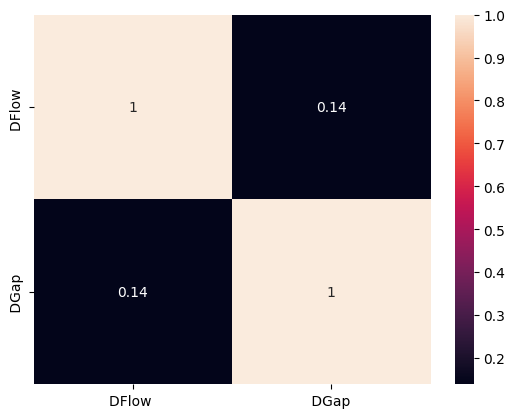

In [ ]:
from tables import Column
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small=pd.DataFrame(Ypred2)
#df_small = y_test.iloc[:,:3]
features=['DFlow ',
' DGap ']
correlation_mat = df_small.corr('pearson')
sns.heatmap(correlation_mat, annot = True,yticklabels=features,xticklabels=features)
plt.show()

In [ ]:
import math
import numpy as np
from statistics import mean
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse3=math.sqrt(mean_squared_error(y_test, Ypred2))
print('RMSE  is',rmse3)
mae3=mean_absolute_error(y_test, Ypred2)
print('MAE  is',mae3)




# Calculate RMSE for each output
rmse_per_output = np.sqrt(mean_squared_error(y_test, Ypred2, multioutput='raw_values'))
print('rmse_per_output:',rmse_per_output)

def relative_root_mean_squared_error(true, pred):
    n = len(true) # update
    num = np.sum(np.square(true - pred)) / n  # update
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


rrmse3=relative_root_mean_squared_error(y_test,Ypred2)
arrmse3=np.mean(rrmse3)
percentage_average_relative_rmse3 = arrmse3 * 100
print("relative_root_mean_squared_error =", rrmse3)
print("arrmse =", arrmse3)
print(f"Percentage arrmse = {percentage_average_relative_rmse3:.2f}%")

RMSE  is 0.4367332906272437
MAE  is 0.3179451717848659
rmse_per_output: [0.2938954  0.54322871]
relative_root_mean_squared_error = DFlow     0.087267
 DGap     0.161303
dtype: float64
arrmse = 0.12428517526784423
Percentage arrmse = 12.43%
